### Clustering
#### K-means Clustrening
- works on hard cluster
- Try to make individual clusters
- One point can belong only one cluster at a time
- Sensitive to outliers

In [1]:
import pandas as pd
d=pd.read_csv('E:/Machine Learning Datasets/Unsupervised/movie_metadata.csv')
d.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [2]:
d.shape

(5043, 28)

In [3]:
d.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [4]:
dlm=d['director_facebook_likes'].mean()
dlm

686.5092123911724

In [5]:
d['director_facebook_likes'].fillna(dlm,inplace=True)

In [6]:
d['director_facebook_likes'].isnull().sum()

0

In [7]:
d['actor_3_facebook_likes'].fillna(d['actor_3_facebook_likes'].mean(),inplace=True)

In [8]:
d['actor_3_facebook_likes'].isnull().sum()

0

In [54]:
X=d.iloc[:,4:6]
X.isnull().sum()

director_facebook_likes    0
actor_3_facebook_likes     0
dtype: int64

In [ ]:
from sklearn.cluster import KMeans

In [11]:
kmeans=KMeans(n_clusters=3)

In [14]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [15]:
kmeans.cluster_centers_

array([[  165.17883939,   423.54434021],
       [14677.77777778,  1368.66666667],
       [  356.10227273, 11181.81818182]])

In [16]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
X['Cluster']=kmeans.labels_

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\RizzWann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RizzWann\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


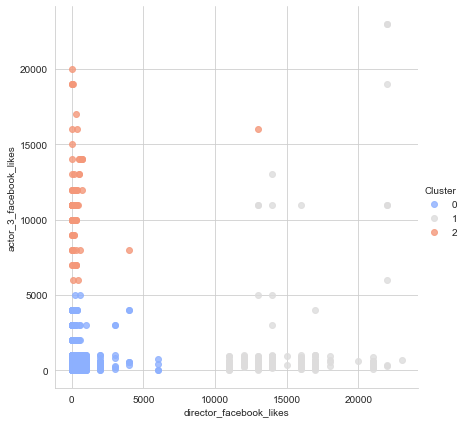

In [19]:
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes','actor_3_facebook_likes',data=X,hue='Cluster',
          palette='coolwarm',size=6,aspect=1,fit_reg=False
          )

### K-Medioids
- not sensitive to outliears

In [20]:
from sklearn_extra.cluster import KMedoids

In [21]:
kmeans=KMedoids(n_clusters=5)

In [22]:
kmeans.fit(X)
X['Cluster']=kmeans.labels_

C:\Users\RizzWann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RizzWann\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


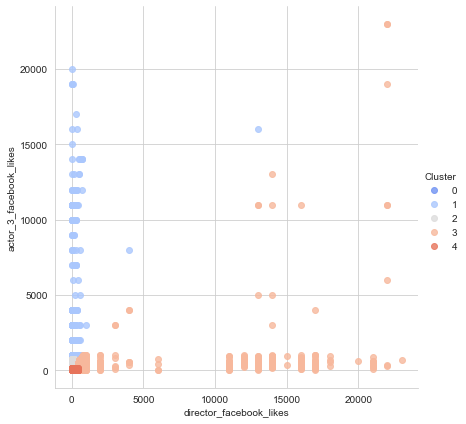

In [24]:
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes','actor_3_facebook_likes',data=X,hue='Cluster',
          palette='coolwarm',size=6,aspect=1,fit_reg=False
          )

#### C-Means Clustering
- One point can belong morethan one cluster at a time
- Refer as soft clustering
- Extention of K-Means

In [55]:
x=np.array(X.values)

In [56]:
x.shape

(5043, 2)

In [48]:
#pip install fuzzy-c-means

In [57]:
from fcmeans import FCM
my_model = FCM(n_clusters=2) # we use two cluster as an example
my_model.fit(x)

C:\Users\RizzWann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


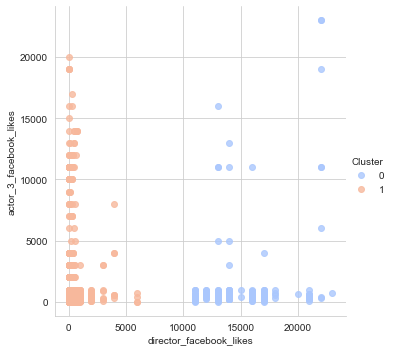

In [62]:
# outputs
fcm_centers = my_model.centers
fcm_labels =my_model.predict(x)
X['Cluster']=fcm_labels
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes','actor_3_facebook_likes',data=X,hue='Cluster',
          palette='coolwarm',fit_reg=False
          )

In [ ]:
#!pip install mlxtend

### Market Basket Anaylsis (Assosiation Rule Mining)
#### Apriori Algo 

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df=pd.read_excel('E:/Machine Learning Datasets/Unsupervised/online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.shape

(525461, 8)

In [4]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [7]:
df['Description']=df['Description'].str.strip()
df.dropna(axis=0,subset=['Invoice'],inplace=True)
df['Invoice']=df['Invoice'].astype('str')

In [10]:
df=df[~df['Invoice'].str.contains('C')]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [13]:
basket=df[df['Country']=='France']

In [14]:
basket.shape

(5532, 8)

In [28]:
basket=basket.groupby(['Invoice','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')

In [29]:
basket

Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED SPOTTY,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,2 DAISIES HAIR COMB,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED SPOTTY,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF CAT STICKERS,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,4 IVORY DINNER CANDLES GOLD FLOCK,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK FLOCK CHRISTMAS BALLS,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50CM METAL STRING WITH 7 CLIPS,6 CHOCOLATE LOVE HEART T-LIGHTS,...,WOODEN HAPPY BIRTHDAY GARLAND,WOODEN HEART CHRISTMAS SCANDINAVIAN,WOODEN PICTURE FRAME WHITE FINISH,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN SKITTLES GARDEN SET,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND HEIGHT CHART STICKERS,WOODLAND STICKERS,WOODLAND ANIMAL WRITING SET,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND PARTY BAG + STICKER SET,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WOODLAND WATER TRANSFER TATTOOS,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP BLUE REINDEER,WRAP BLUE RUSSIAN FOLKART,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FOLK ART,WRAP GREEN PEARS,WRAP GREEN RUSSIAN FOLKART,WRAP I LOVE LONDON,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP SUKI AND FRIENDS,WRAP WINTER FOREST,"WRAP, CAROUSEL",YELLOW BREAKFAST CUP AND SAUCER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,6.0,6.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
489883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...

In [30]:
def encode_units(x):
    if x<=0:
        return 0
    if x >= 1:
        return 1

In [32]:
basket_set=basket.applymap(encode_units)
basket_set

Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED SPOTTY,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,2 DAISIES HAIR COMB,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED SPOTTY,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF CAT STICKERS,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,4 IVORY DINNER CANDLES GOLD FLOCK,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK FLOCK CHRISTMAS BALLS,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50CM METAL STRING WITH 7 CLIPS,6 CHOCOLATE LOVE HEART T-LIGHTS,...,WOODEN HAPPY BIRTHDAY GARLAND,WOODEN HEART CHRISTMAS SCANDINAVIAN,WOODEN PICTURE FRAME WHITE FINISH,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN SKITTLES GARDEN SET,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND HEIGHT CHART STICKERS,WOODLAND STICKERS,WOODLAND ANIMAL WRITING SET,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND PARTY BAG + STICKER SET,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WOODLAND WATER TRANSFER TATTOOS,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP BLUE REINDEER,WRAP BLUE RUSSIAN FOLKART,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FOLK ART,WRAP GREEN PEARS,WRAP GREEN RUSSIAN FOLKART,WRAP I LOVE LONDON,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP SUKI AND FRIENDS,WRAP WINTER FOREST,"WRAP, CAROUSEL",YELLOW BREAKFAST CUP AND SAUCER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489439,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
489883,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
basket_set.drop('POSTAGE',inplace=True,axis=1)
basket_set

Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED SPOTTY,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,2 DAISIES HAIR COMB,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED SPOTTY,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF CAT STICKERS,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,4 IVORY DINNER CANDLES GOLD FLOCK,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK FLOCK CHRISTMAS BALLS,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50CM METAL STRING WITH 7 CLIPS,6 CHOCOLATE LOVE HEART T-LIGHTS,...,WOODEN HAPPY BIRTHDAY GARLAND,WOODEN HEART CHRISTMAS SCANDINAVIAN,WOODEN PICTURE FRAME WHITE FINISH,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN SKITTLES GARDEN SET,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND HEIGHT CHART STICKERS,WOODLAND STICKERS,WOODLAND ANIMAL WRITING SET,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND PARTY BAG + STICKER SET,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WOODLAND WATER TRANSFER TATTOOS,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP BLUE REINDEER,WRAP BLUE RUSSIAN FOLKART,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FOLK ART,WRAP GREEN PEARS,WRAP GREEN RUSSIAN FOLKART,WRAP I LOVE LONDON,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP SUKI AND FRIENDS,WRAP WINTER FOREST,"WRAP, CAROUSEL",YELLOW BREAKFAST CUP AND SAUCER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489439,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
489883,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
freq_items=apriori(basket_set,min_support=0.07,use_colnames=True)
rules=association_rules(freq_items,metric='lift',min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CIRCUS PARADE LUNCH BOX),(PLASTERS IN TIN CIRCUS PARADE),0.116183,0.161826,0.070539,0.607143,3.751832,0.051738,2.133535
1,(PLASTERS IN TIN CIRCUS PARADE),(CIRCUS PARADE LUNCH BOX),0.161826,0.116183,0.070539,0.435897,3.751832,0.051738,1.566767
2,(SPACEBOY LUNCH BOX),(CIRCUS PARADE LUNCH BOX),0.132780,0.116183,0.087137,0.656250,5.648438,0.071710,2.571105
3,(CIRCUS PARADE LUNCH BOX),(SPACEBOY LUNCH BOX),0.116183,0.132780,0.087137,0.750000,5.648437,0.071710,3.468880
4,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.132780,0.087137,0.070539,0.531250,6.096726,0.058969,1.947441


In [37]:
rules[(rules['lift'] >=6) & (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.087137,0.13278,0.070539,0.809524,6.096726,0.058969,4.552905
34,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.120332,0.13278,0.099585,0.827586,6.232759,0.083607,5.029876


In [38]:
from mlxtend.frequent_patterns import fpgrowth

In [42]:
fpgrowth(basket_set, min_support=0.09, use_colnames=True)

,support,itemsets
0,0.269710,(RED TOADSTOOL LED NIGHT LIGHT)
1,0.116183,(ASSORTED COLOUR MINI CASES)
2,0.091286,(LUNCHBOX WITH CUTLERY RETROSPOT)
3,0.091286,(BAKING SET 9 PIECE RETROSPOT)
4,0.132780,(WOODLAND CHARLOTTE BAG)
5,0.120332,(PACK OF 72 RETRO SPOT CAKE CASES)
6,0.103734,(SET OF 3 CASES WOODLAND DESIGN)
7,0.091286,(JUMBO BAG WOODLAND ANIMALS)
8,0.186722,(RED/WHITE DOT MINI CASES)
9,0.153527,(RED SPOTTY CHARLOTTE BAG)
